# Error Correction Comparision Between pyMeasure and StatistiCAL
The purpose of this notebook is to compare the results of applying functions in pyMeasure.Code.Analysis.SParameter with the application of corrections directly through StatistiCAL

Overview:
1. Start StatistiCAL
2. Select Help->Load Sample Problem with DUT
3. Press Calibrate
4. Select Results->Save Corrected DUT->Save as DUT.txt
5. Select Results->Save 12 Term Error Correction->Save as ErrorCoefficents.txt
6. Select Results->Save Solution Vector -> Solution_Plus.txt (Saves isolation and switch terms too)
7. Select Results->Save 4-port error box-> ErrorBox.s4p
7. Open and Plot corrected DUT using pyMeasure (this is an average I think DY202, DY2022, DY202 measured with Rnd noise,etc)
8. Open DY202 with pyMeasure, Open SolutionVector, Open ErrorCoefficents
9. Correct DY202 and store as s2p
10. Plot DUT, and Corrected DY202 using both methods 

In [1]:
import re,os
from pyMeasure import *

The module smithplot was not found,please put it on the python path


In [2]:
JUPYTER_DIRECTORY=r'C:\Users\sandersa\PyCharm Projects\Jupyter-Notebooks'
TEST_DIRECTORY=os.path.join(JUPYTER_DIRECTORY,"Error_Correction_Comparison_Files")

In [3]:
corrected_DUT=S2PV1(os.path.join(TEST_DIRECTORY,"DUT.txt"))
uncorrected_DUTs=map(lambda x:S2PV1(os.path.join(TEST_DIRECTORY,x)),["DY202.txt","DY2022.txt",
                                        "DY202_measured with rnd.txt",
                                        "DY202_measured with rnd1.txt"])

<IPython.core.display.Javascript object>


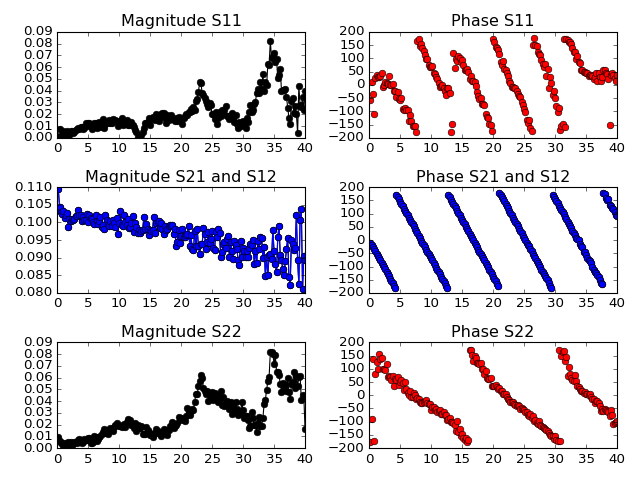

In [44]:
%matplotlib notebook
corrected_DUT.show()

In [5]:
# open the correction files
twelve_term=TwelveTermErrorModel(os.path.join(TEST_DIRECTORY,"CalCoefficients.txt"))
solution_vector=StatistiCALSolutionModel(os.path.join(TEST_DIRECTORY,"Solution_Plus.txt"))
switch_terms=S2PV1(os.path.join(TEST_DIRECTORY,"SwitchTerms.txt"))
four_port=SNP(os.path.join(TEST_DIRECTORY,"ErrorBox.s4p"))

In [6]:
switch_corrected_DUTS=map(lambda x: x.correct_switch_terms(switch_terms.sparameter_complex),uncorrected_DUTs)

In [7]:
pyMeasure_corrected_complex=map(lambda x:correct_sparameters_twelve_term(x.sparameter_complex,
                                                                      twelve_term.complex_data),uncorrected_DUTs)
pyMeasure_eight_term_complex=map(lambda x:correct_sparameters_eight_term(x.sparameter_complex,
                                                                      solution_vector.eight_term_correction),uncorrected_DUTs)
pyMeasure_sixteen_term_complex=map(lambda x:correct_sparameters_sixteen_term(x.sparameter_complex,
                                                                   four_port.sparameter_complex),uncorrected_DUTs)
switch_corrected_DUTS=[]
for dut in uncorrected_DUTs:
    dut.correct_switch_terms(switch_terms.sparameter_complex)
    switch_corrected_DUTS.append(dut)
pyMeasure_eight_term_complex_sw=map(lambda x:correct_sparameters_eight_term(x.corrected_sparameter_data,
                                                                      solution_vector.eight_term_correction),switch_corrected_DUTS)

In [8]:
pyMeasure_corrected_DUTS=map(lambda x:S2PV1(None,sparameter_complex=x),pyMeasure_corrected_complex)
pyMeasure_eight_term_corrected_DUTS=map(lambda x:S2PV1(None,sparameter_complex=x),pyMeasure_eight_term_complex)
pyMeasure_eight_term_corrected_DUTS_sw=map(lambda x:S2PV1(None,sparameter_complex=x),pyMeasure_eight_term_complex_sw)
pyMeasure_sixteen_term_corrected_DUTS=map(lambda x:S2PV1(None,sparameter_complex=x),pyMeasure_sixteen_term_complex)

<IPython.core.display.Javascript object>


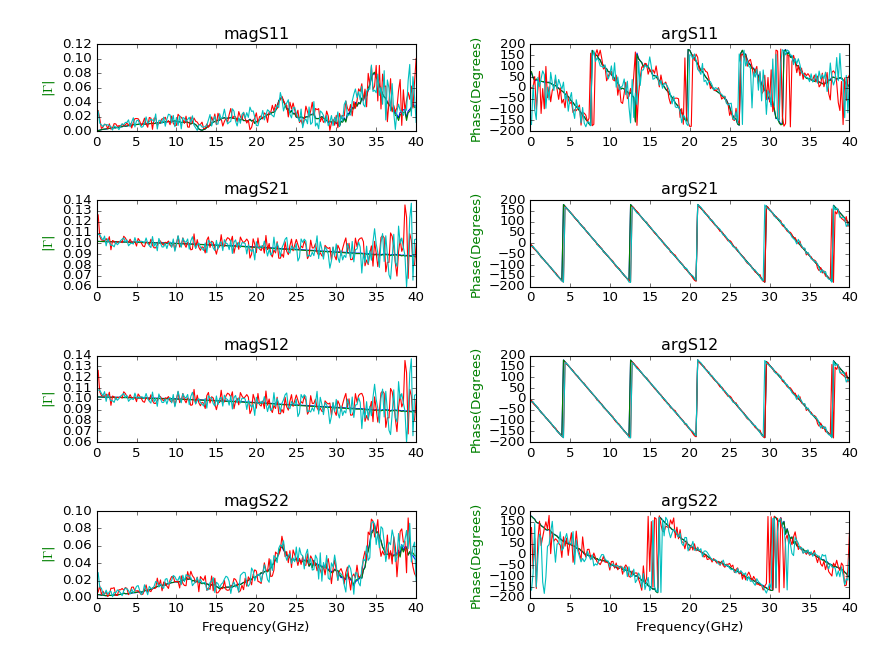

In [43]:
compare_s2p_plots(pyMeasure_corrected_DUTS,labels=["DY202.txt","DY2022.txt",
                                        "DY202_measured with rnd.txt",
                                        "DY202_measured with rnd1.txt"],display_legend=False)

<IPython.core.display.Javascript object>


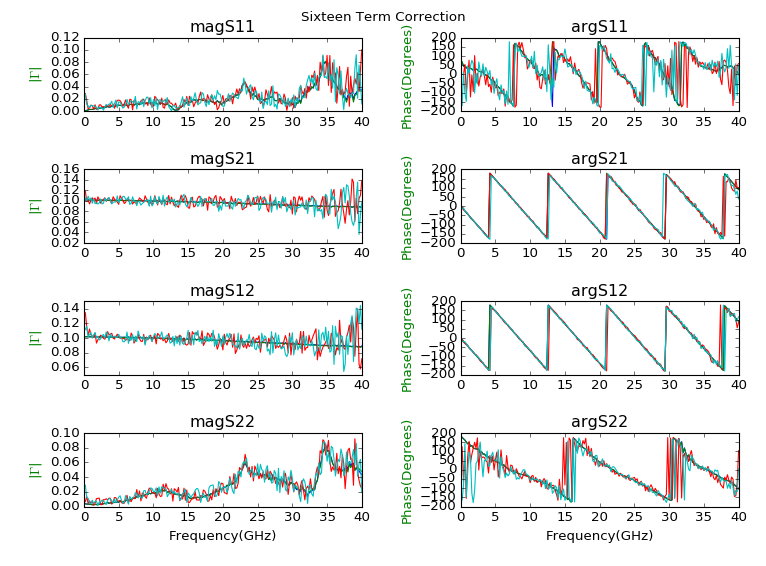

In [42]:
compare_s2p_plots(pyMeasure_sixteen_term_corrected_DUTS,labels=["DY202.txt","DY2022.txt",
                                        "DY202_measured with rnd.txt",
                                        "DY202_measured with rnd1.txt"],display_legend=False)
plt.suptitle("Sixteen Term Correction")

<IPython.core.display.Javascript object>


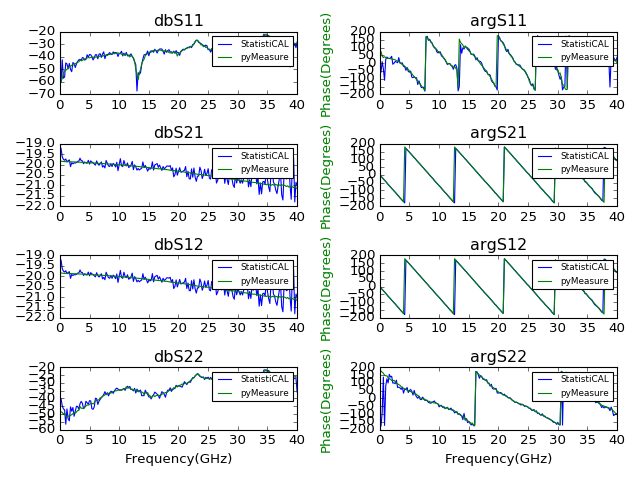

In [41]:
compare_s2p_plots([corrected_DUT,pyMeasure_corrected_DUTS[1]],labels=["StatistiCAL","pyMeasure"],format="DB")

<IPython.core.display.Javascript object>


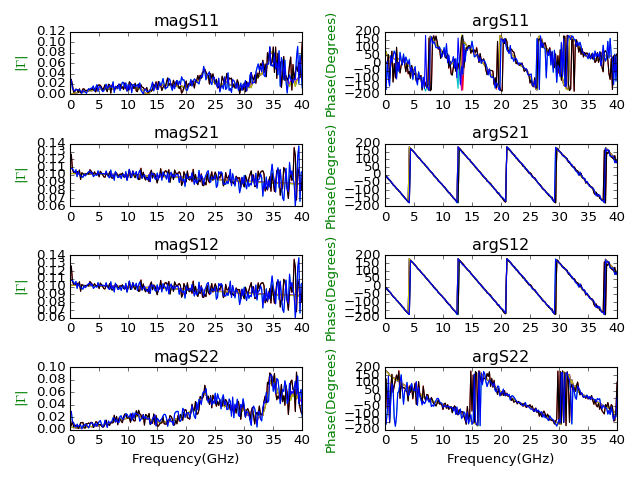

In [40]:
compare_s2p_plots(pyMeasure_corrected_DUTS+pyMeasure_eight_term_corrected_DUTS,display_legend=False)

<IPython.core.display.Javascript object>


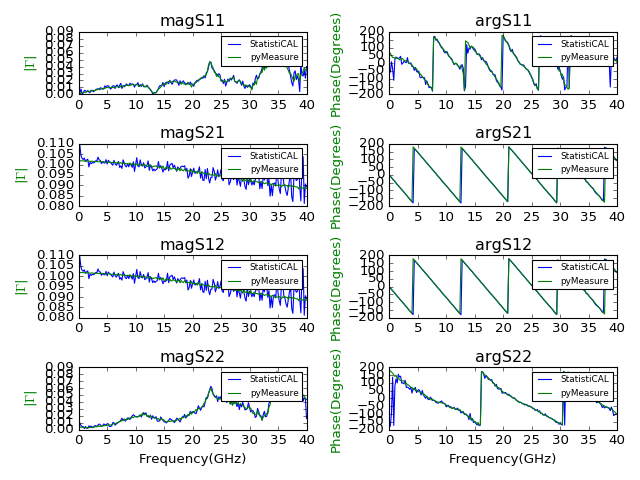

In [39]:
compare_s2p_plots([corrected_DUT,pyMeasure_eight_term_corrected_DUTS[0]],labels=["StatistiCAL","pyMeasure"])

<IPython.core.display.Javascript object>


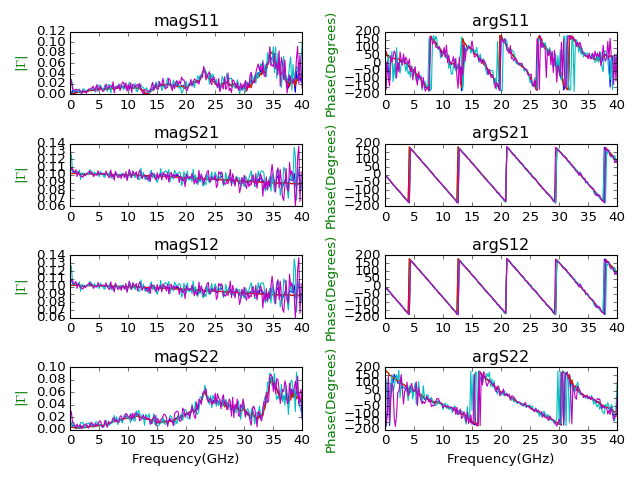

In [38]:
compare_s2p_plots([corrected_DUT]+pyMeasure_eight_term_corrected_DUTS_sw,display_legend=False)

<IPython.core.display.Javascript object>


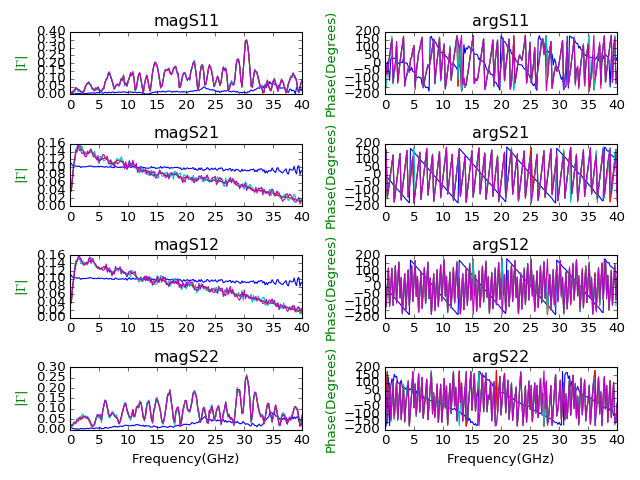

In [37]:
compare_s2p_plots([corrected_DUT]+uncorrected_DUTs,display_legend=False)

In [16]:
solution_vector.eight_term_correction[0]

[0.2,
 (0.0016408467149763299-0.0050353483822310604j),
 (-0.018701036574263401-0.59474980749412898j),
 (-0.018701036574263401-0.59474980749412898j),
 (-0.018376068954949198+0.0285682624434958j),
 (-0.0050633199233565797+0.00475975463623642j),
 (0.30725276611849101-0.55668097626163604j),
 (0.30725276611849101-0.55668097626163604j),
 (0.0082488113366578405+0.0094412438199317893j)]

In [17]:
solution_vector.S2[0]

[0.2,
 (-0.0050633199233565797+0.00475975463623642j),
 (0.30725276611849101-0.55668097626163604j),
 (0.30725276611849101-0.55668097626163604j),
 (0.0082488113366578405+0.0094412438199317893j)]

In [18]:
solution_vector.complex_data[0][6]*solution_vector.complex_data[0][7]

(-0.10848990277499426-0.6295343816287668j)

In [19]:
solution_vector.data[0][1:15]

[0.00164084671497633,
 -0.00503534838223106,
 -0.0183760689549492,
 0.0285682624434958,
 -0.0187010365742634,
 -0.594749807494129,
 -0.00506331992335658,
 0.00475975463623642,
 0.00824881133665784,
 0.00944124381993179,
 0.307252766118491,
 -0.556680976261636,
 0.784362063855738,
 -0.627805388429192]

In [20]:
S2_12=complex(0.307252766118491, -0.556680976261636)

In [21]:
cmath.sqrt(S2_12)

(0.6866939144808599-0.4053341412545402j)

<IPython.core.display.Javascript object>


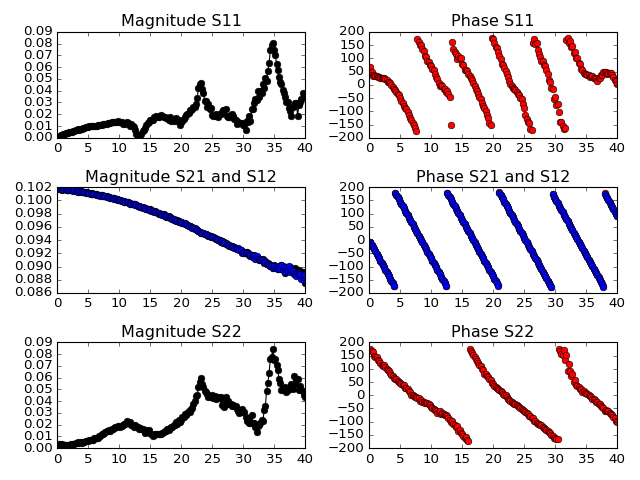

In [36]:
StatistiCAL_corrected_DUT=S2PV1(os.path.join(TEST_DIRECTORY,"TwelveTermCorrectedDUTStatistiCAL.txt"))
StatistiCAL_corrected_DUT.show()

<IPython.core.display.Javascript object>


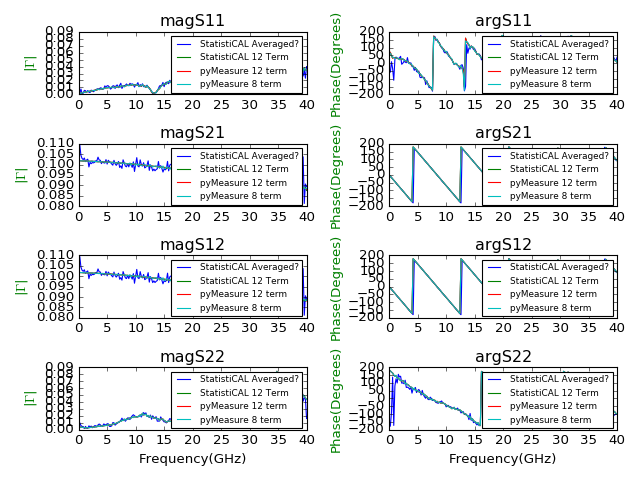

In [35]:
compare_s2p_plots([corrected_DUT,StatistiCAL_corrected_DUT,pyMeasure_corrected_DUTS[0],pyMeasure_eight_term_corrected_DUTS[0]],
                  labels=["StatistiCAL Averaged?",
                          "StatistiCAL 12 Term","pyMeasure 12 term","pyMeasure 8 term"],format="MA",display_legend=True)

In [24]:
#0.2 1.64084671497633E-03 -5.03534838223106E-03 -1.83760689549492E-02 2.85682624434958E-02 -0.353377604745351 2.22448758049676E-02 0 0 2.95276694732935E-03 -2.03871753015277E-04 -0.372318585444985 7.62093828586019E-02 8.24881133665784E-03 9.44124381993179E-03 -5.06331992335658E-03 4.75975463623642E-03 -0.215489447044144 -0.342083539603859 0 0 -2.66589914243509E-02 2.44610745343206E-02 -0.154610081308739 -0.34343784855721
StatistiCAL_corrected_DUT.change_data_format("MA")

pm=pyMeasure_eight_term_corrected_DUTS[0]  
pm.change_data_format("MA")
for i in range(100):
    value_1=StatistiCAL_corrected_DUT.get_column("argS21")[i]
    value_2=(pm.get_column("argS21")[i]+pm.get_column("argS12")[i])/2
    value_3=pm.get_column("argS21")[i]
    value_4=pm.get_column("argS12")[i]
    #last_value
    print value_1,value_2,value_3,value_4

-8.71128365532 -8.68133356714 -8.68133356714 -8.68133356714
-17.3102790425 -17.2537916449 -17.2537916449 -17.2537916449
-25.9181709892 -25.9003160014 -25.9003160014 -25.9003160014
-34.5192214405 -34.4990418107 -34.4990418107 -34.4990418107
-43.0855919117 -43.0716237166 -43.0716237166 -43.0716237166
-51.6601863246 -51.6264746738 -51.6264746738 -51.6264746738
-60.2648317939 -60.2257492944 -60.2257492944 -60.2257492944
-68.8368048572 -68.8196707295 -68.8196707295 -68.8196707295
-77.471557578 -77.4565258666 -77.4565258666 -77.4565258666
-86.023542801 -85.9929854727 -85.9929854727 -85.9929854727
-94.5978880856 -94.5483300086 -94.5483300086 -94.5483300086
-103.202830282 -103.175872805 -103.175872805 -103.175872805
-111.785402677 -111.801849403 -111.801849403 -111.801849403
-120.395182022 -120.366909987 -120.366909987 -120.366909987
-128.953705522 -128.841892507 -128.841892507 -128.841892507
-137.524118485 -137.593780554 -137.593780554 -137.593780554
-146.15533313 -146.125201702 -146.12520170

In [25]:
print twelve_term.complex_data[0]

[0.2, (0.00164084671497633-0.00503534838223106j), (-0.0183760689549492+0.0285682624434958j), (-0.353377604745351+0.0222448758049676j), 0j, (0.00295276694732935-0.000203871753015277j), (-0.372318585444985+0.0762093828586019j), (0.00824881133665784+0.00944124381993179j), (-0.00506331992335658+0.00475975463623642j), (-0.215489447044144-0.342083539603859j), 0j, (-0.0266589914243509+0.0244610745343206j), (-0.154610081308739-0.34343784855721j)]


<IPython.core.display.Javascript object>


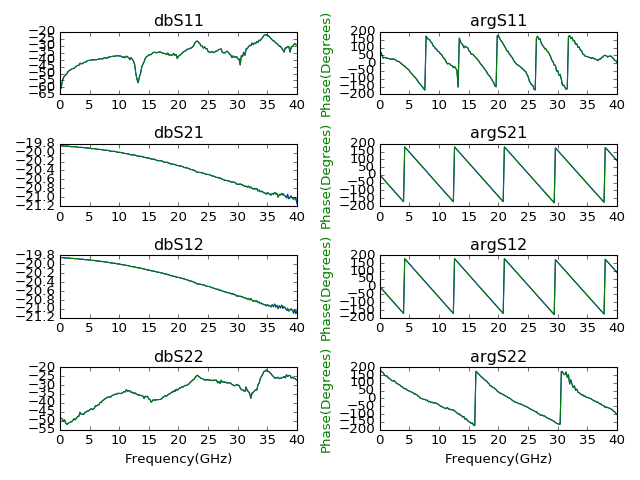

In [45]:
compare_s2p_plots([StatistiCAL_corrected_DUT,pyMeasure_corrected_DUTS[0]],
                  labels=["StatistiCAL 12 Term","pyMeasure 12 term"],format="DB",display_legend=False)

In [27]:
3.8%math.pi

0.6584073464102067

In [28]:
cmath.sqrt(complex(1,2)*complex(1,2))

(1+2j)

In [29]:
from pyMeasure.Code.Utils.PerformanceUtils import *

In [31]:
#Now check it for the MUF
uncorrected_MUF_DUT=S2PV1(os.path.join(TEST_DIRECTORY,"DUT.s2p"))
corrected_MUF_DUT=S2PV1(os.path.join(TEST_DIRECTORY,"DUT_0.s2p"))
MUF_correction=SNP(os.path.join(TEST_DIRECTORY,"Solution_0.s4p"))
pyMeasure_Corrected=S2PV1(None,sparameter_complex=correct_sparameters_sixteen_term(uncorrected_MUF_DUT.sparameter_complex,
                                                                                      MUF_correction.sparameter_complex))
@timer
def compare_muf_20160901():
    uncorrected_MUF_DUT=S2PV1(os.path.join(TEST_DIRECTORY,"DUT.s2p"))
    corrected_MUF_DUT=S2PV1(os.path.join(TEST_DIRECTORY,"DUT_0.s2p"))
    MUF_correction=SNP(os.path.join(TEST_DIRECTORY,"Solution_0.s4p"))
    pyMeasure_Corrected=S2PV1(None,sparameter_complex=correct_sparameters_sixteen_term(uncorrected_MUF_DUT.sparameter_complex,
                                                                                      MUF_correction.sparameter_complex))


<IPython.core.display.Javascript object>


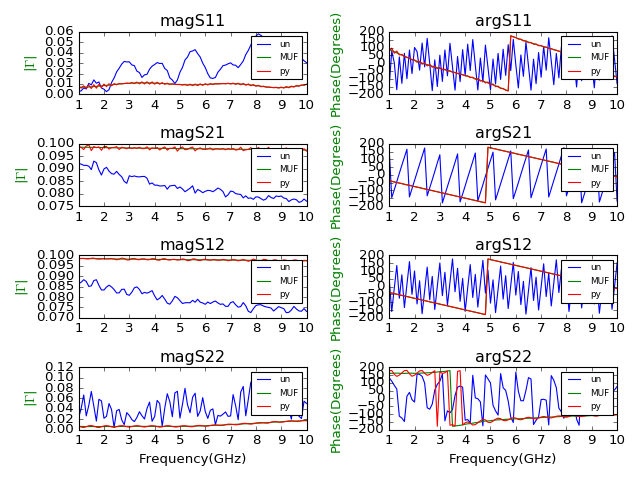

In [32]:
compare_s2p_plots([uncorrected_MUF_DUT,corrected_MUF_DUT,pyMeasure_Corrected],labels=["un","MUF","py"])

In [33]:
compare_muf_20160901()

The function compare_muf_20160901 started at 2016-09-02 15:46:51.341000 and ended at 2016-09-02 15:46:51.664000
It took 0.323 seconds to run


<IPython.core.display.Javascript object>


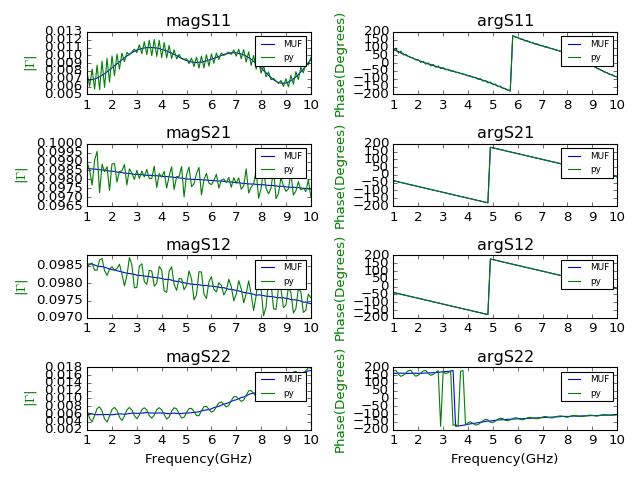

In [34]:
compare_s2p_plots([corrected_MUF_DUT,pyMeasure_Corrected],labels=["MUF","py"])